# 최종 코드(마지막에 있음)

In [1]:
import os
os.getcwd()

'c:\\jupyter\\sperm'

In [ ]:
# 파일 정렬 라이브러리
!pip install natsort

# 프레임으로 분할 후 폴더에 저장

In [3]:
import os
import cv2
import natsort

def split_videos_in_folder(path):
    # 바운딩 영상을 가져올 폴더
    input_folder = path

    # 프레임을 저장할 폴더
    output_folder = "C:/jupyter/sperm/frame/"

    # 입력 폴더의 모든 파일을 가져옵니다. 지 마음대로 가져옴
    # files = os.listdir(input_folder)

    # 파일 정렬
    files = natsort.natsorted(os.listdir(input_folder))

    # 프레임을 저장할 폴더를 생성합니다.
    os.makedirs(output_folder, exist_ok=True)

    for file in files:
        frame_count = 0
                
        # 파일의 확장자를 가져옵니다.
        _, ext = os.path.splitext(file)

        # 파일이 영상 파일인지 확인합니다. (확장자가 .mp4, .avi 등)
        if ext.lower() in [".mp4", ".avi"]:
            # 영상 파일을 엽니다.
            video_path = os.path.join(input_folder, file)
            cap = cv2.VideoCapture(video_path)

            # 비디오 열기를 실패하면 다음 파일로 넘어갑니다.
            if not cap.isOpened():
                print(f"{file} 비디오 열기 실패")
                continue

            # 동영상 파일명에서 확장자 제거하여 저장할 이미지 파일명으로 사용합니다.
            video_name = os.path.splitext(file)[0]

            while True:
                # 프레임을 읽습니다.
                ret, frame = cap.read()
                if not ret:
                    break

                # 프레임을 이미지 파일로 저장합니다.
                frame_path = os.path.join(output_folder, f"{video_name}_{frame_count}.jpg")
                cv2.imwrite(frame_path, frame)

                frame_count += 1

            cap.release()
            print(f"{file} 프레임 분할 완료")

# 기본 경로
path = "C:/jupyter/sperm/video/little"
path2 = "C:/jupyter/sperm/video/many"
#path = "/home/vmadmin/goqba/mk2/extractTest"

def main():
    split_videos_in_folder(path2)
    
if __name__ == "__main__":
    main()
    cv2.destroyAllWindows()

13260-1a.mp4 프레임 분할 완료
13260-2a.mp4 프레임 분할 완료
13260-3a.mp4 프레임 분할 완료
13260-4a.mp4 프레임 분할 완료
13260-5a.mp4 프레임 분할 완료
21993-1a.mp4 프레임 분할 완료
21993-2a.mp4 프레임 분할 완료
21993-3a.mp4 프레임 분할 완료
21993-4a.mp4 프레임 분할 완료
21993-5a.mp4 프레임 분할 완료
54088-1a.mp4 프레임 분할 완료
54088-2a.mp4 프레임 분할 완료
54088-3a.mp4 프레임 분할 완료
54088-4a.mp4 프레임 분할 완료
54088-5a.mp4 프레임 분할 완료
56830-1a.mp4 프레임 분할 완료
56830-2a.mp4 프레임 분할 완료
56830-3a.mp4 프레임 분할 완료
56830-4a.mp4 프레임 분할 완료
56830-5a.mp4 프레임 분할 완료
58437-1a.mp4 프레임 분할 완료
58437-2a.mp4 프레임 분할 완료
58437-3a.mp4 프레임 분할 완료
58437-4a.mp4 프레임 분할 완료
58437-5a.mp4 프레임 분할 완료
58482-1a.mp4 프레임 분할 완료
58482-2a.mp4 프레임 분할 완료
58482-3a.mp4 프레임 분할 완료
58482-4a.mp4 프레임 분할 완료
58482-5a.mp4 프레임 분할 완료
59201-1a.mp4 프레임 분할 완료
59201-2a.mp4 프레임 분할 완료
59201-3a.mp4 프레임 분할 완료
59201-4a.mp4 프레임 분할 완료
59201-5a.mp4 프레임 분할 완료
60998-1a.mp4 프레임 분할 완료
60998-2a.mp4 프레임 분할 완료
60998-3a.mp4 프레임 분할 완료
60998-4a.mp4 프레임 분할 완료
60998-5a.mp4 프레임 분할 완료
61874-1a.mp4 프레임 분할 완료
61874-2a.mp4 프레임 분할 완료
61874-3a.mp4 프레임 분할 완료
61874-4a.mp

# 이미지 하나에 대한 히스토그램 출력(그래프로)
### 프레임으로 분할된 이미지 중 하나를 선택해 테스트 해봄

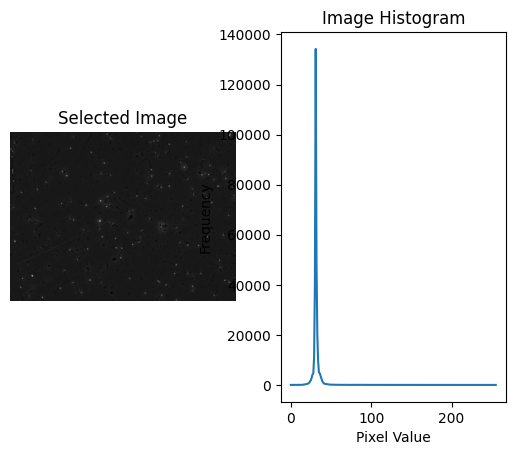

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = random.choice(image_files)
selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 선택된 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Selected Image")
plt.axis('off')

# 히스토그램 그래프 출력
plt.subplot(1, 2, 2)
plt.plot(hist)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# 창 띄우기
plt.show()

# 이미지 하나에 대한 히스토그램 출력(막대 그래프로)
### 프레임으로 분할된 이미지 중 하나를 선택해 테스트 해봄

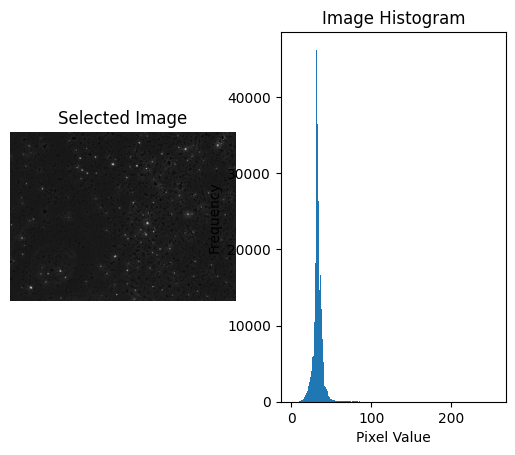

In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = random.choice(image_files)
selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 선택된 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Selected Image")
plt.axis('off')

# 막대 그래프로 히스토그램 표현
plt.subplot(1, 2, 2)
plt.bar(range(256), hist[:,0], width=1)
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# 창 띄우기
plt.show()


# 세로 출력

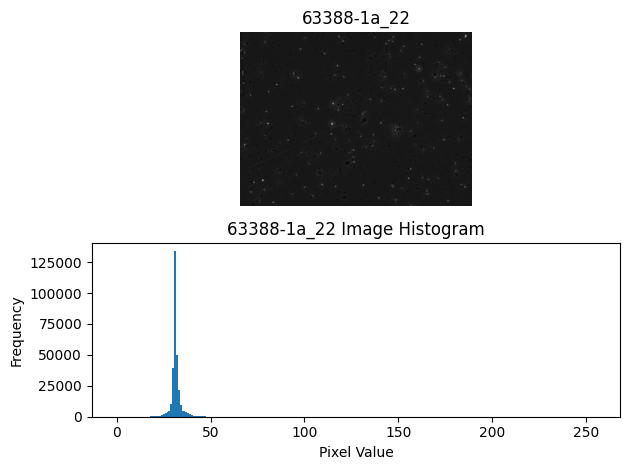

In [33]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = random.choice(image_files)
selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 파일명에서 확장자 제거
file_name_without_extension = os.path.splitext(selected_image_filename)[0]

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 이미지와 파일명 출력
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.title(file_name_without_extension)  # 파일명을 이미지 제목으로 설정
plt.axis('off')

# 막대 그래프로 히스토그램 표현
plt.subplot(2, 1, 2)
plt.bar(range(256), hist[:,0], width=1)
plt.title(file_name_without_extension + " Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# 창 띄우기
plt.tight_layout()
plt.show()

### 빈도수가 가장 많은 픽셀 값, 해당 픽셀 값의 빈도수

빈도수가 가장 큰 픽셀 값: 30, 빈도수: 74313.0


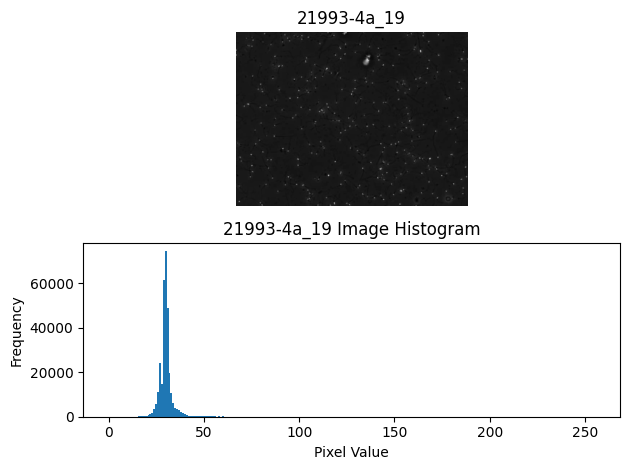

In [40]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = random.choice(image_files)
selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 파일명에서 확장자 제거
file_name_without_extension = os.path.splitext(selected_image_filename)[0]

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 이미지와 파일명 출력
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.title(file_name_without_extension)  # 파일명을 이미지 제목으로 설정
plt.axis('off')

# 막대 그래프로 히스토그램 표현
plt.subplot(2, 1, 2)
plt.bar(range(256), hist[:,0], width=1)
plt.title(file_name_without_extension + " Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# 차트에서 빈도수가 가장 큰 값 찾기
max_frequency_value = np.argmax(hist)
max_frequency = hist[max_frequency_value]

print(f"빈도수가 가장 많은 픽셀 값: {max_frequency_value}, 빈도수: {max_frequency[0]}")

# 창 띄우기
plt.tight_layout()
plt.show()

### 빈도수가 가장 많은 픽셀 값, 해당 픽셀 값의 빈도수, 이미지 픽셀 평균

빈도수가 가장 큰 픽셀 값: 31, 빈도수: 61864.0
이미지 픽셀 값의 평균: 33.31


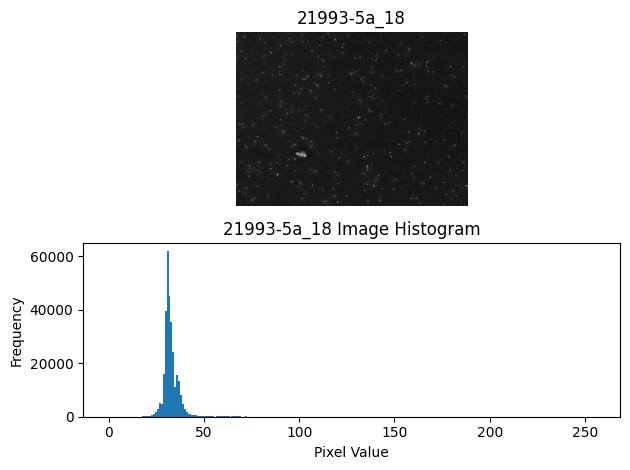

In [47]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = random.choice(image_files)
selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 파일명에서 확장자 제거
file_name_without_extension = os.path.splitext(selected_image_filename)[0]

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 이미지와 파일명 출력
plt.subplot(2, 1, 1)
plt.imshow(image, cmap='gray')
plt.title(file_name_without_extension)  # 파일명을 이미지 제목으로 설정
plt.axis('off')

# 막대 그래프로 히스토그램 표현
plt.subplot(2, 1, 2)
plt.bar(range(256), hist[:,0], width=1)
plt.title(file_name_without_extension + " Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# 빈도수가 가장 큰 값 찾기
max_frequency_value = np.argmax(hist)
max_frequency = hist[max_frequency_value]

# 이미지 픽셀 값의 평균 계산
average_pixel_value = np.mean(image)

print(f"빈도수가 가장 큰 픽셀 값: {max_frequency_value}, 빈도수: {max_frequency[0]}")
print(f"이미지 픽셀 값의 평균: {average_pixel_value:.2f}")

# 창 띄우기
plt.tight_layout()
plt.show()

# 히스토그램 저장하기(히스토그램만 이미지로 저장됨)

빈도수가 가장 큰 픽셀 값: 31, 빈도수: 115889.0
이미지 픽셀 값의 평균: 31.24


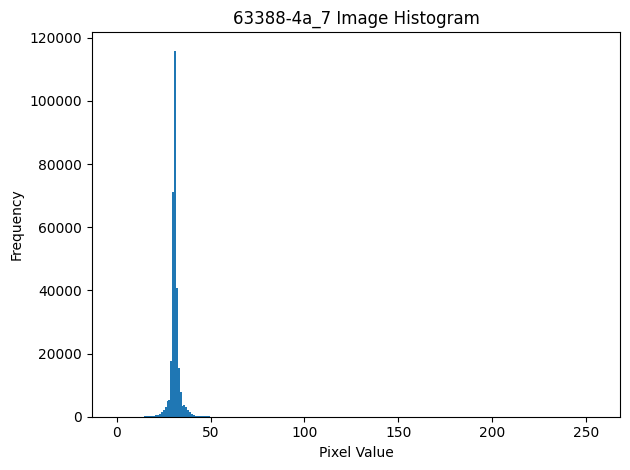

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = random.choice(image_files)
selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 파일명에서 확장자 제거
file_name_without_extension = os.path.splitext(selected_image_filename)[0]

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 막대 그래프로 히스토그램 표현
plt.bar(range(256), hist[:,0], width=1)
plt.title(file_name_without_extension + " Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# 빈도수가 가장 큰 값 찾기
max_frequency_value = np.argmax(hist)
max_frequency = hist[max_frequency_value]

# 이미지 픽셀 값의 평균 계산
average_pixel_value = np.mean(image)

print(f"빈도수가 가장 큰 픽셀 값: {max_frequency_value}, 빈도수: {max_frequency[0]}")
print(f"이미지 픽셀 값의 평균: {average_pixel_value:.2f}")

# 지정한 경로가 존재하지 않을 경우 경로 생성
output_directory = 'C:/jupyter/sperm/histograms/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 히스토그램 이미지 저장
output_image_path = os.path.join(output_directory, f"{file_name_without_extension}_histogram.png")
plt.savefig(output_image_path)

# 창 띄우기
plt.tight_layout()
plt.show()

# 파일명, 빈도수가 가장 많은 픽셀 값, 빈도수, 이미지 픽셀 값의 평균을 CSV로 저장(이미지 하나 기준)

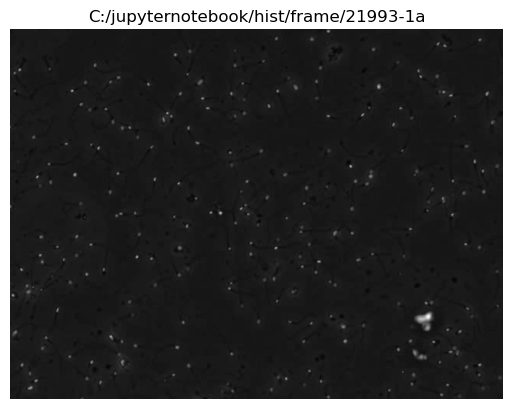

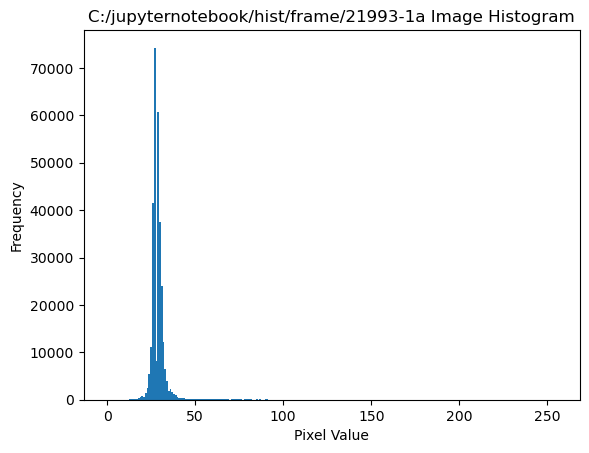

빈도수가 가장 많은 픽셀 값: 27, 빈도수: 74268.0
이미지 픽셀 값의 평균: 29.27
가장 큰 픽셀 값: 27
Pixel Value: 0, Frequency: 0
Pixel Value: 1, Frequency: 0
Pixel Value: 2, Frequency: 0
Pixel Value: 3, Frequency: 0
Pixel Value: 4, Frequency: 1
Pixel Value: 5, Frequency: 1
Pixel Value: 6, Frequency: 0
Pixel Value: 7, Frequency: 2
Pixel Value: 8, Frequency: 6
Pixel Value: 9, Frequency: 15
Pixel Value: 10, Frequency: 13
Pixel Value: 11, Frequency: 31
Pixel Value: 12, Frequency: 45
Pixel Value: 13, Frequency: 75
Pixel Value: 14, Frequency: 63
Pixel Value: 15, Frequency: 135
Pixel Value: 16, Frequency: 214
Pixel Value: 17, Frequency: 253
Pixel Value: 18, Frequency: 352
Pixel Value: 19, Frequency: 498
Pixel Value: 20, Frequency: 747
Pixel Value: 21, Frequency: 674
Pixel Value: 22, Frequency: 1405
Pixel Value: 23, Frequency: 2449
Pixel Value: 24, Frequency: 5362
Pixel Value: 25, Frequency: 11146
Pixel Value: 26, Frequency: 41540
Pixel Value: 27, Frequency: 74268
Pixel Value: 28, Frequency: 8142
Pixel Value: 29, Frequency: 

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import csv

# 이미지 폴더 경로
image_folder = 'C:/jupyternotebook/hist/frame/21993-1a.jpg'

# 이미지 파일 목록 생성
#image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 랜덤하게 이미지 선택
selected_image_filename = image_folder
#selected_image_path = os.path.join(image_folder, selected_image_filename)

# 이미지 불러오기
image = cv2.imread(image_folder, cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 불러와졌는지 확인
if image is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# 파일명에서 확장자 제거
file_name_without_extension = os.path.splitext(selected_image_filename)[0]

# 히스토그램 계산
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# 이미지 출력
plt.imshow(image, cmap='gray')
plt.title(file_name_without_extension)  # 파일명을 이미지 제목으로 설정
plt.axis('off')
plt.show()

# 막대 그래프로 히스토그램 표현
plt.bar(range(256), hist[:,0], width=1)
plt.title(file_name_without_extension + " Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# 빈도수가 가장 큰 값 찾기
max_frequency_value = np.argmax(hist)
max_frequency = hist[max_frequency_value]

# 이미지 픽셀 값의 평균 계산
average_pixel_value = np.mean(image)

# 히스토그램의 x 축 값 중에서 가장 큰 값을 찾아 출력
max_pixel_value = np.argmax(hist)


print(f"빈도수가 가장 많은 픽셀 값: {max_frequency_value}, 빈도수: {max_frequency[0]}")
print(f"이미지 픽셀 값의 평균: {average_pixel_value:.2f}")
print(f"가장 큰 픽셀 값: {max_pixel_value}")

# 히스토그램의 모든 x 값 출력
for pixel_value, frequency in enumerate(hist):
    print(f"Pixel Value: {pixel_value}, Frequency: {int(frequency[0])}")
    
# 지정한 경로가 존재하지 않을 경우 경로 생성
output_directory = 'C:/jupyter/sperm/histograms/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# 히스토그램 이미지 저장
output_image_path = os.path.join(output_directory, f"{file_name_without_extension}_histogram.png")
plt.bar(range(256), hist[:,0], width=1)
plt.title(file_name_without_extension + " Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.savefig(output_image_path)
plt.close()

# CSV 파일에 저장
csv_output_path = os.path.join(output_directory, f"{file_name_without_extension}.csv")
csv_header = ['파일명', '가장 많은 픽셀 값', '빈도 수', '픽셀 값 평균']
csv_data = [file_name_without_extension, max_frequency_value, max_frequency[0], average_pixel_value]

# 파일이 존재하지 않으면 헤더와 함께 파일을 생성하고, 이미 존재하면 데이터를 추가합니다.
if not os.path.exists(csv_output_path):
    with open(csv_output_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_header)
        writer.writerow(csv_data)
else:
    with open(csv_output_path, mode='a', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_data)

# 파일 내 전체 이미지 적용(최종)

In [79]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from natsort import natsorted

# 이미지 폴더 경로
image_folder = 'C:/jupyter/sperm/frame/'

# 이미지 파일 목록 생성 (자연 정렬)
image_files = natsorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

# 지정한 경로가 존재하지 않을 경우 경로 생성
output_directory = 'C:/jupyter/sperm/histograms/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# CSV 파일 생성 및 헤더 작성
csv_output_path = os.path.join(output_directory, 'data.csv')
csv_header = ['파일명', '가장 많은 픽셀 값', '빈도 수', '픽셀 값 평균']

with open(csv_output_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(csv_header)

# 각 이미지에 대한 작업 반복
for selected_image_filename in image_files:
    selected_image_path = os.path.join(image_folder, selected_image_filename)

    # 이미지 불러오기
    image = cv2.imread(selected_image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지가 정상적으로 불러와졌는지 확인
    if image is None:
        print(f"{selected_image_filename} 이미지를 불러올 수 없습니다.")
        continue

    # 파일명에서 확장자 제거
    # file_name_without_extension = os.path.splitext(selected_image_filename)[0]

    # 히스토그램 계산
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # 빈도수가 가장 큰 값 찾기
    max_frequency_value = np.argmax(hist)
    max_frequency = hist[max_frequency_value]

    # 이미지 픽셀 값의 평균 계산
    average_pixel_value = np.mean(image)

    # 히스토그램 이미지 저장
    output_image_path = os.path.join(output_directory, f"{white}_histogram.png")
    plt.bar(range(256), hist[:,0], width=1)
    plt.title(file_name_without_extension + " Image Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.savefig(output_image_path)
    plt.close()

    # CSV 파일에 데이터 추가
    csv_data = [file_name_without_extension, max_frequency_value, max_frequency[0], average_pixel_value]

    with open(csv_output_path, mode='a', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(csv_data)

print("작업이 완료되었습니다.")

작업이 완료되었습니다.
